# Processamento do Texto

Esse notebook as funções para fazer o pré-processamento dos textos do diários com foco em extrair uma representação textual dos textos, extração dos termos mais frequentes e análise de similaridade dos textos. 

## Imports Necessários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import sys, os


In [2]:
# Código para poder usar os módulos implementados nesse repositório no notebook 
path_module = os.path.abspath('../modules/')
if path_module not in sys.path:
    sys.path.append(path_module)

In [3]:
# Imports para o projeto
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocess.pre_process_text import PreProcessText
from preprocess.plot_embeddings import PlotEmbeddings
from utils.process_gazette import ProcessGazette

## Processamento do Texto

O código a seguir mostra um pequeno exemplo de como podemos trabalhar com os métodos de pré-processamento.

In [4]:
# Carrega o modelo de linguagem do Spacy
pp = PreProcessText("pt_core_news_lg")

In [5]:
tokens = pp.process_text("O prefeito autorizou, na tarde de ontem, a abertura de concurso público. As informações devem sair no diário oficial até quarta-feira.")

In [6]:
tokens

'prefeito autorizou abertura concurso público informações diário oficial quarta-feira'

## Processamento do Diário Teste

In [7]:
import os
from utils.process_gazette import ProcessGazette  

# Diretório onde os Diários Oficiais estão armazenados
gazette_directory = "./gazettes/"

# Inicialize a classe de processamento
pg = ProcessGazette(BASE_DIR=gazette_directory)

# Listar todos os arquivos no diretório
files = os.listdir(gazette_directory)

# Lista para armazenar todos os textos completos dos Diários Oficiais
all_texts = []

for file in files:
    if file.endswith(".txt"):  
        with open(os.path.join(gazette_directory, file), 'r', encoding='utf-8') as f:
            text = f.read()
            # all_texts.append(text)
            all_texts.append(pp.process_text(text))

In [8]:
all_texts

["salvador sábado segunda-feira setembro outubro executivo decretos financeiros decretos simples procuradoria município secretaria municipal fazenda municipal tributos secretaria municipal gestão diretoria previdência secretaria municipal educação secretaria municipal secretaria municipal comunicação secretaria municipal promoção social combate pobreza esportes municipal assistência social salvador secretaria municipal desenvolvimento urbano secretaria municipal cultura turismo secult fundação gregório mattos secretaria municipal mobilidade junta administrativa recursos infrações secretaria municipal pública guarda municipal secretaria municipal inovação tecnologia comitê municipal tecnologia informação comunicação licitações secretaria municipal gestão secretaria municipal educação secretaria municipal secretaria municipal mobilidade superintendência trânsito salvador transalvador secretaria municipal pública empresa limpeza urbana salvador limpurb secretaria municipal manutenção cida

In [9]:
preprocessed_texts = []

for text in all_texts:
    
    preprocessed_texts.append(text)


In [10]:
preprocessed_texts

["salvador sábado segunda-feira setembro outubro executivo decretos financeiros decretos simples procuradoria município secretaria municipal fazenda municipal tributos secretaria municipal gestão diretoria previdência secretaria municipal educação secretaria municipal secretaria municipal comunicação secretaria municipal promoção social combate pobreza esportes municipal assistência social salvador secretaria municipal desenvolvimento urbano secretaria municipal cultura turismo secult fundação gregório mattos secretaria municipal mobilidade junta administrativa recursos infrações secretaria municipal pública guarda municipal secretaria municipal inovação tecnologia comitê municipal tecnologia informação comunicação licitações secretaria municipal gestão secretaria municipal educação secretaria municipal secretaria municipal mobilidade superintendência trânsito salvador transalvador secretaria municipal pública empresa limpeza urbana salvador limpurb secretaria municipal manutenção cida

## Trabalhando com os Embeddings

In [11]:
pe = PlotEmbeddings("pt_core_news_lg")

In [14]:
vetorizador = TfidfVectorizer()

In [15]:
vetor_tfidf = vetorizador.fit_transform(preprocessed_texts)

In [16]:
#ordeno os indices do vetor tfidf e pego os 10 maiores, 0 seria a unica linha que tenho, 50 mais relevantes, -1 para inverter a ordem
indices_palavras_frequentes = vetor_tfidf.toarray().argsort()[0][-70:][::-1]
palavras_frequentes = [vetorizador.get_feature_names()[i] for i in indices_palavras_frequentes]

d:\Nitro 5\Downloads\conda\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
print(indices_palavras_frequentes)

[ 9651  5769  8655 10207 11336  7433  4302 11613   984 11451  8389 10105
  3477  4901  2839 10943  2689  7912  5475 11458 11486  5928   773  3328
 11393  2854 12075  6153  9818  3632  6309  9247  9128  5780  8262 10169
  6590  8658  3326 12180 10276  3054  1311 11457 10951  9098  3974  4962
  4283  9439  4117  9281 10326  1220   559  4091 11773  8996 11605  5149
  5414 10216  5406 11384  1143  2633  7175  1474  1044  2384]


In [18]:
print(palavras_frequentes)

['pessoa', 'física', 'municipal', 'proponente', 'salvador', 'jurídica', 'edital', 'setembro', 'apresentou', 'secretaria', 'mercuri', 'processo', 'decreto', 'especificado', 'conforme', 'residência', 'comprovante', 'lucrativos', 'festival', 'secretário', 'segunda', 'gestão', 'anexou', 'cultural', 'santos', 'conhecer', 'sábado', 'guilherme', 'portaria', 'dependente', 'histórias', 'orçamentária', 'oliveira', 'gabinete', 'matrícula', 'projeto', 'inciso', 'município', 'cultura', 'teatro', 'provimento', 'contrato', 'atribuições', 'secretária', 'resolve', 'oficial', 'diretoria', 'estabelecido', 'edilza', 'passeio', 'diário', 'outubro', 'publicação', 'associação', 'almeida', 'divergente', 'social', 'objeto', 'serviços', 'ex', 'feira', 'proposta', 'federal', 'santana', 'artigo', 'complementar', 'janeiro', 'bahia', 'araujo', 'claudio']


d:\Nitro 5\Downloads\conda\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Nitro 5\Downloads\conda\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


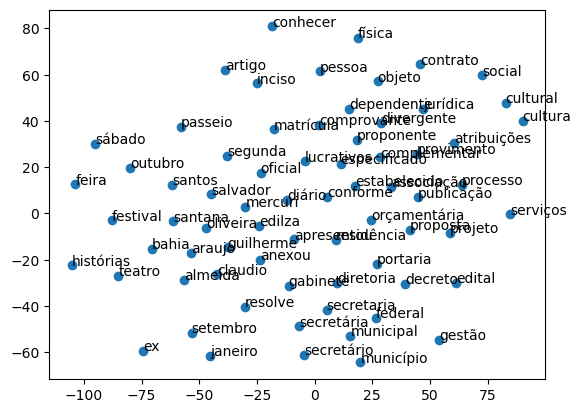

In [19]:
pe.plot_embeddings(palavras_frequentes)